<a href="https://colab.research.google.com/github/irenetobby/Supervised_learning_assignment/blob/main/Supervised_learning_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('/content/House_Pricing.csv')

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [5]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.dtypes

,0
ID,int64
Date House was Sold,object
Sale Price,float64
No of Bedrooms,int64
No of Bathrooms,float64
Flat Area (in Sqft),float64
Lot Area (in Sqft),float64
No of Floors,float64
Waterfront View,object
No of Times Visited,object


In [7]:
data.shape

(21613, 21)

In [8]:
data.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [9]:
data.drop(['Date House was Sold','Age of House (in Years)','ID','Lot Area after Renovation (in Sqft)'],axis=1,inplace =True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21613 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21604 non-null  float64
 4   Lot Area (in Sqft)                         21604 non-null  float64
 5   No of Floors                               21613 non-null  float64
 6   Waterfront View                            21613 non-null  object 
 7   No of Times Visited                        2124 non-null   object 
 8   Condition of the House                     21613 non-null  object 
 9   Overall Grade                              21613 non-null  int64  
 10  Area of the House from

In [11]:
data['No of Times Visited'].fillna(data['No of Times Visited'].mode()[0],inplace = True)

/tmp/ipython-input-1925369209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['No of Times Visited'].fillna(data['No of Times Visited'].mode()[0],inplace = True)


In [12]:
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace = True)

/tmp/ipython-input-2222260210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace = True)


In [13]:
# Drop irrelevant columns for this regression task
data_cleaned = data.drop(columns=['Waterfront View', 'No of Times Visited', 'Condition of the House'], errors='ignore')

# Impute missing numerical values with the mean
import numpy as np
for col in data_cleaned.select_dtypes(include=np.number).columns:
    if data_cleaned[col].isnull().any():
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())

# Define X and y
X = data_cleaned.drop('Sale Price', axis=1)
y = data_cleaned['Sale Price']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Linear Regression")
print("R2:", r2_lr)
print("MAPE:", mape_lr)
print("Coefficients:", lin_reg.coef_, lin_reg.intercept_)


Linear Regression
R2: 0.6136913083314504
MAPE: 0.28304450219057675
Coefficients: [-4.49053657e+04  1.46594780e+04  2.64165070e+02  7.13758437e-02
 -2.44965399e+04  3.09864512e+04 -1.86088079e+01 -3.59089805e+01
  7.42827234e+01 -3.80083525e+02  6.55199120e+05 -4.40752466e+05
  6.46992354e+01] -47931276.63556585


In [15]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    "MAPE": [
        mean_absolute_percentage_error(y_test, y_pred_lr),
        mean_absolute_percentage_error(y_test, y_pred_ridge),
        mean_absolute_percentage_error(y_test, y_pred_lasso)
    ]
})

results

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.082e+14, tolerance: 2.107e+11
  model = cd_fast.enet_coordinate_descent(


,Model,R2 Score,MAPE
0,Linear,0.613691,0.283045
1,Ridge,0.613657,0.282938
2,Lasso,0.613691,0.283044


In [16]:
class MyLinearRegression:
    def __init__(self):
        self.m = 0.0
        self.c = 0.0
        self.losses = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n = len(X)

        for _ in range(n_iters):
            y_pred = self.m * X + self.c

            dm = (-2/n) * np.sum(X * (y - y_pred))
            dc = (-2/n) * np.sum(y - y_pred)

            self.m -= lr * dm
            self.c -= lr * dc

            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


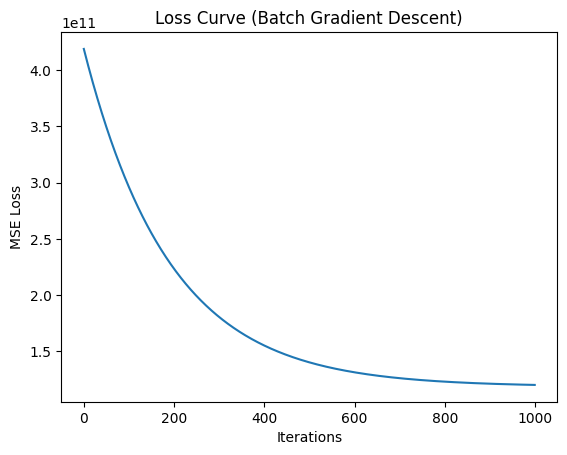

In [17]:
model = MyLinearRegression()
model.fit(X_train['No of Bedrooms'], y_train, lr=0.0001, n_iters=1000)

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Batch Gradient Descent)")
plt.show()

In [18]:
class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0.0
        self.c = 0.0
        self.losses = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n = len(X)

        for _ in range(n_iters):
            idx = np.random.randint(0, n)
            x_i = X.iloc[idx]
            y_i = y.iloc[idx]

            y_pred = self.m * x_i + self.c

            dm = -2 * x_i * (y_i - y_pred)
            dc = -2 * (y_i - y_pred)

            self.m -= lr * dm
            self.c -= lr * dc

            loss = np.mean((y - (self.m * X + self.c)) ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return self.m * X + self.c

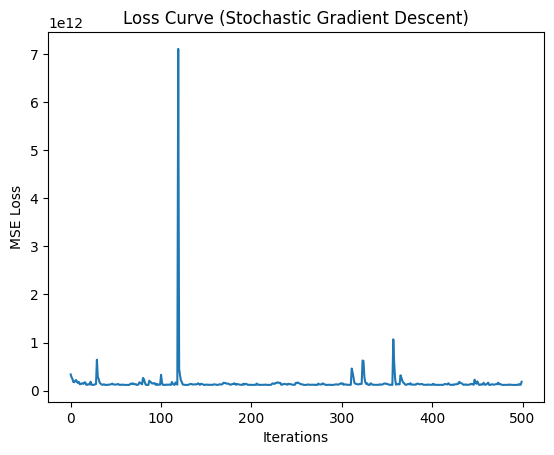

In [19]:
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train['No of Bedrooms'], y_train, lr=0.01, n_iters=500)

plt.plot(sgd_model.losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve (Stochastic Gradient Descent)")
plt.show()

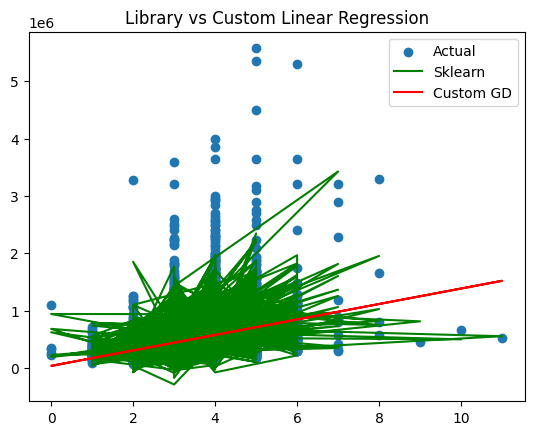

In [20]:
plt.scatter(X_test['No of Bedrooms'], y_test, label="Actual")
plt.plot(X_test['No of Bedrooms'], y_pred_lr, color="green", label="Sklearn")
plt.plot(X_test['No of Bedrooms'], model.predict(X_test['No of Bedrooms']), color="red", label="Custom GD")
plt.legend()
plt.title("Library vs Custom Linear Regression")
plt.show()